In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib


C:\Users\Shafna M Salam\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Shafna M Salam\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv('hiring.csv')
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
data.experience=data.experience.fillna('zero')
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
#data.interpolate(inplace=True)
#data

In [5]:
a=data['test_score(out of 10)'].mean()
a

7.857142857142857

In [6]:
import math
b=math.floor(a)
b


7

In [7]:
data.fillna(b,inplace=True)

In [8]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [9]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


#convert wor d to number

In [10]:
#pip install word2number

In [11]:
from word2number import w2n

In [12]:
data.experience=data['experience'].apply(w2n.word_to_num)

In [13]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [14]:
x=data.drop(['salary($)'],axis=1)

In [15]:
y=data[['salary($)']]

In [16]:
x

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,7.0,7
7,11,7.0,8


In [17]:
y

,salary($)
0,50000
1,45000
2,60000
3,65000
4,70000
5,62000
6,72000
7,80000


In [18]:
model=DecisionTreeRegressor(max_depth=6)

In [19]:
model.fit(x,y)

DecisionTreeRegressor(max_depth=6)

In [20]:
model.score(x,y)

1.0

In [21]:
y_pred=model.predict(x)
y_pred

array([50000., 45000., 60000., 65000., 70000., 62000., 72000., 80000.])

In [22]:
prediction1=model.predict([[0,8,9]])
prediction1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([50000.])

In [23]:
y

,salary($)
0,50000
1,45000
2,60000
3,65000
4,70000
5,62000
6,72000
7,80000


In [24]:
y_pred

array([50000., 45000., 60000., 65000., 70000., 62000., 72000., 80000.])

In [31]:
#pd.DataFrame({"actual y":y,"predicted y":y_pred})

In [26]:
from sklearn import tree

In [27]:
print(tree.export_text(model))

|--- feature_0 <= 1.00
|   |--- feature_2 <= 7.50
|   |   |--- value: [45000.00]
|   |--- feature_2 >  7.50
|   |   |--- value: [50000.00]
|--- feature_0 >  1.00
|   |--- feature_0 <= 6.00
|   |   |--- feature_1 <= 8.50
|   |   |   |--- feature_2 <= 8.50
|   |   |   |   |--- value: [60000.00]
|   |   |   |--- feature_2 >  8.50
|   |   |   |   |--- value: [62000.00]
|   |   |--- feature_1 >  8.50
|   |   |   |--- value: [65000.00]
|   |--- feature_0 >  6.00
|   |   |--- feature_0 <= 10.50
|   |   |   |--- feature_2 <= 6.50
|   |   |   |   |--- value: [70000.00]
|   |   |   |--- feature_2 >  6.50
|   |   |   |   |--- value: [72000.00]
|   |   |--- feature_0 >  10.50
|   |   |   |--- value: [80000.00]



In [28]:
feature=list(x.columns)

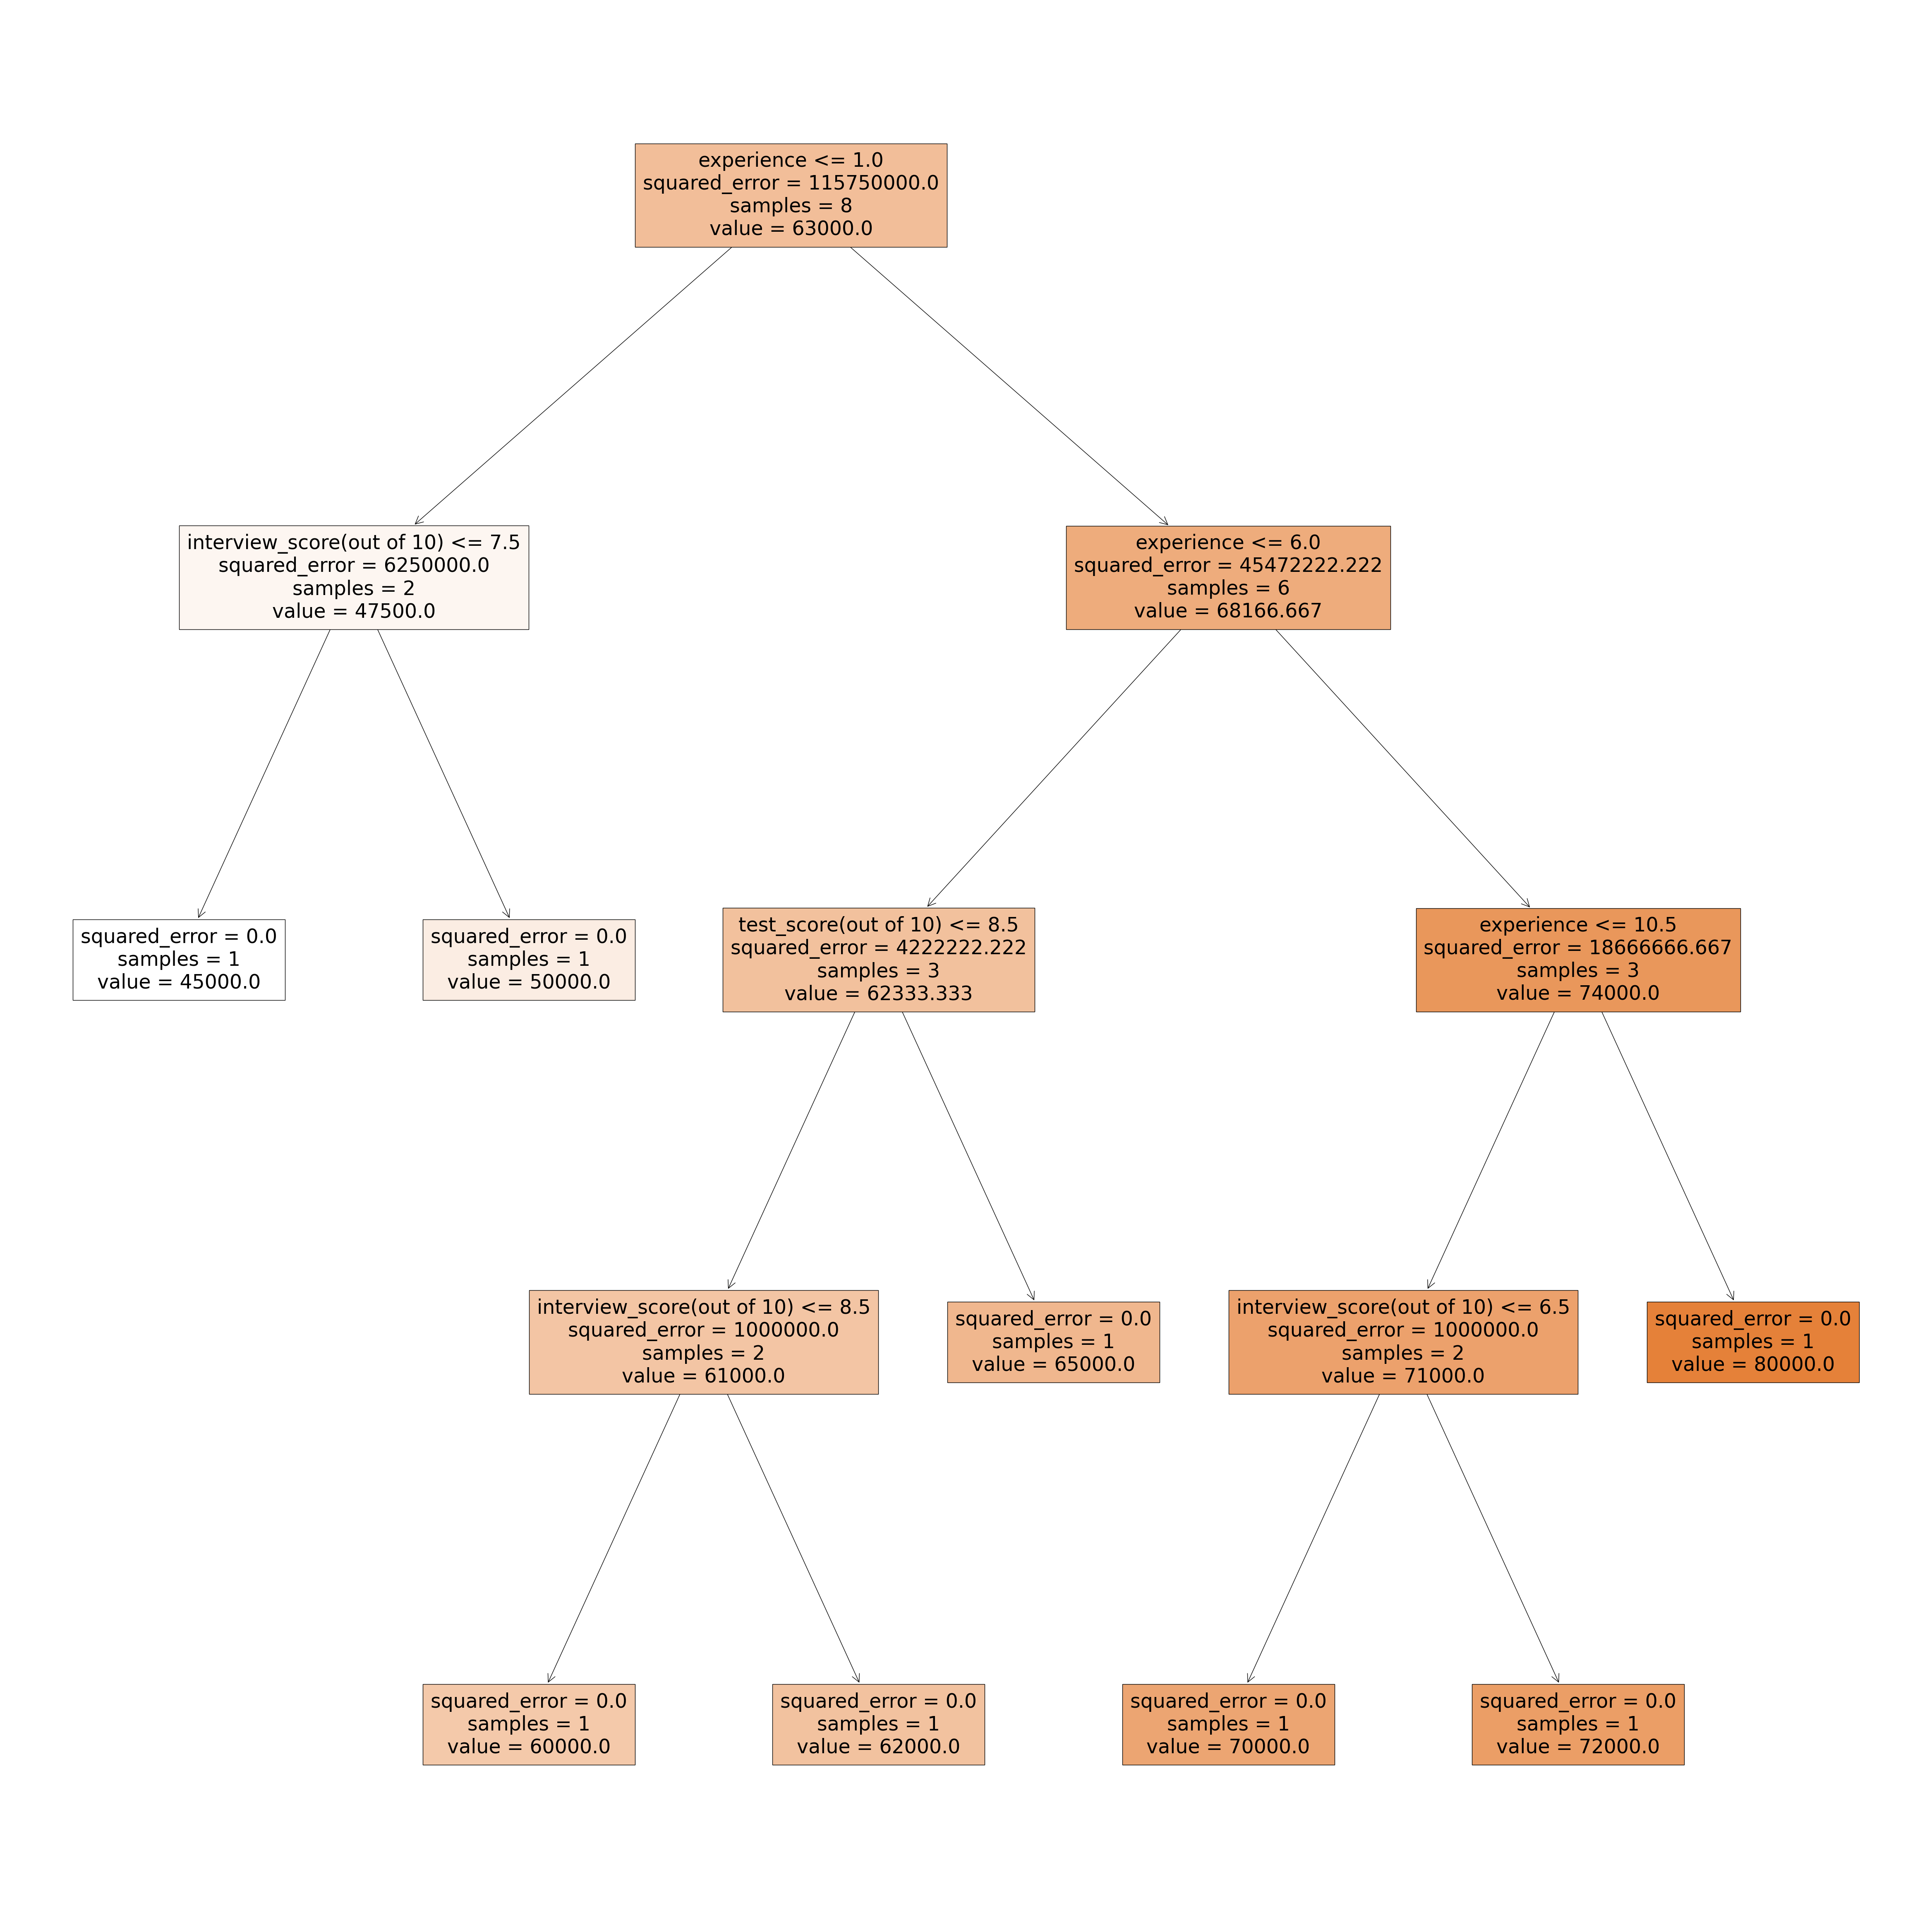

In [29]:
fig=plt.figure(figsize=(60,60))
tree.plot_tree(model,feature_names=feature,
              class_names='salary($)',filled=True)
plt.show()